<a href="https://colab.research.google.com/github/gusmaomarcos/portfolio/blob/main/running_DS_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
from datetime import timezone
from zoneinfo import ZoneInfo

In [1147]:
strava = pd.read_csv('/content/drive/MyDrive/running_DS/activities.csv')

In [1148]:
cols = ['Activity Date', 'Activity Name', 'Elapsed Time', 'Distance', 'Max Heart Rate','Average Heart Rate',
        'Relative Effort', 'Max Speed', 'Average Speed', 'Elevation Gain', 'Average Cadence',
        'Weather Condition', 'Weather Temperature', 'Humidity', 'Wind Speed', 'Precipitation Intensity']

strava = strava[cols]

In [1149]:
strava.shape

(390, 16)

In [1150]:
strava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Activity Date            390 non-null    object 
 1   Activity Name            390 non-null    object 
 2   Elapsed Time             390 non-null    int64  
 3   Distance                 390 non-null    float64
 4   Max Heart Rate           193 non-null    float64
 5   Average Heart Rate       193 non-null    float64
 6   Relative Effort          193 non-null    float64
 7   Max Speed                341 non-null    float64
 8   Average Speed            390 non-null    float64
 9   Elevation Gain           344 non-null    float64
 10  Average Cadence          135 non-null    float64
 11  Weather Condition        160 non-null    float64
 12  Weather Temperature      160 non-null    float64
 13  Humidity                 160 non-null    float64
 14  Wind Speed               1

In [1151]:
strava.describe()

,Elapsed Time,Distance,Max Heart Rate,Average Heart Rate,Relative Effort,Max Speed,Average Speed,Elevation Gain,Average Cadence,Weather Condition,Weather Temperature,Humidity,Wind Speed,Precipitation Intensity
count,390.000000,390.000000,193.000000,193.000000,193.000000,341.000000,390.000000,344.000000,135.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,2823.761538,7.309769,172.943005,155.914914,118.264249,4.887559,2.732827,25.721127,72.712997,2.306250,25.211750,0.736250,1.948625,0.147500
std,1871.567905,4.552075,15.154478,15.958257,108.141871,1.640973,0.378653,16.476441,8.627775,1.228574,3.762009,0.118363,0.867467,0.358033
min,12.000000,0.000000,71.000000,71.000000,0.000000,0.000000,0.000000,0.000000,55.293365,1.000000,16.049999,0.440000,0.500000,0.000000
25%,1738.750000,4.990000,169.000000,150.784424,50.000000,3.867778,2.533451,17.215177,69.955627,1.000000,22.580000,0.650000,1.327500,0.000000
50%,2432.000000,6.090000,174.000000,158.890732,99.000000,4.400000,2.712816,23.581724,72.846817,3.000000,25.345000,0.745000,1.780000,0.000000
75%,3380.500000,8.627500,181.000000,164.722565,151.000000,5.484033,2.943651,33.142727,75.103161,3.000000,28.040000,0.820000,2.462500,0.055000
max,20130.000000,43.150000,196.000000,185.157043,941.000000,14.200000,3.998293,106.185371,155.818832,5.000000,35.180000,0.970000,5.280000,2.300000


In [1152]:
strava['Activity Date'] = pd.to_datetime(strava['Activity Date'])

if strava['Activity Date'].dt.tz is None:
    strava['Activity Date'] = strava['Activity Date'].dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo')
else:
    strava['Activity Date'] = strava['Activity Date'].dt.tz_convert('America/Sao_Paulo')

strava['Start Time'] = strava['Activity Date'].dt.strftime('%H:%M')

strava['Date'] = strava['Activity Date'].dt.strftime('%d/%m/%y')

strava['Month'] = strava['Activity Date'].dt.month_name()

strava['Year'] = strava['Activity Date'].dt.year.astype(object)

strava['dayofweek'] = strava['Activity Date'].dt.dayofweek
week = {0:'Monday', 1:'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}
strava['dayofweek'] = strava['dayofweek'].replace(week)

<ipython-input-1152-dddea45afa74>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  strava['Activity Date'] = pd.to_datetime(strava['Activity Date'])


In [1153]:
strava['Elapsed Time'] = strava['Elapsed Time']/60

In [1154]:
strava['pace'] = strava['Elapsed Time'] / strava['Distance']

In [1155]:
strava.shape

(390, 22)

In [1156]:
strava = strava[strava['pace'] <= 7.84]

In [1157]:
strava.shape

(359, 22)

In [1158]:
strava = strava[strava['Distance'] >= 2.0]

In [1159]:
strava.shape

(341, 22)

In [1160]:
strava = strava[strava['dayofweek'] != 'Monday']

In [1161]:
strava.shape

(340, 22)

In [1162]:
strava['Average Heart Rate'].mean()

158.5932275020715

In [1163]:
strava['Weather Temperature'].mean().round(0)

25.0

In [1164]:
strava.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 389
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype                            
---  ------                   --------------  -----                            
 0   Activity Date            340 non-null    datetime64[ns, America/Sao_Paulo]
 1   Activity Name            340 non-null    object                           
 2   Elapsed Time             340 non-null    float64                          
 3   Distance                 340 non-null    float64                          
 4   Max Heart Rate           165 non-null    float64                          
 5   Average Heart Rate       165 non-null    float64                          
 6   Relative Effort          165 non-null    float64                          
 7   Max Speed                299 non-null    float64                          
 8   Average Speed            340 non-null    float64                          
 9   Elevation Gain 

In [1165]:
strava['Average Speed'] = round((strava['Average Speed'] * 3.6), 2)
strava['Max Speed'] = round((strava['Max Speed'] * 3.6), 2)

In [1166]:
strava['act_type'] = 'treino'

In [1167]:
races = ['Circuito das Estações 2024 - Etapa Verão', 'Corrida da Portela 2024',
         'Circuito das Estações 2024 - Etapa Primavera', 'Bimbo Global Race 2024',
         'Rio-S 21K', 'Circuito das Estações 2024 - Etapa Inverno',
         'Circuito Banco do Brasil 2024', 'Asics Golden Run 2024',
         'Eco Run', 'Maratona do Rio 2024',
         'Night Run 1 - Apollo', 'Circuito das Estações 2024 - Etapa Outono',
         'Circuito do Sol 2024', '1a Corrida de Vera Cruz',
         'Wings for Life World Run - 2019', 'Wings for Life World Run 2024',
         'Circuito das Estações 2019 - Etapa Outono', 'Circuito das Estações 2017 - Etapa Verão',
         'Circuito das Estações 2017 - Etapa Primavera', 'Night Run - Etapa Blue',
         'Circuito das Estações 2017 - Etapa Inverno', 'Night Run Yellow',
         'Circuito das Estações 2017 - Etapa Outono', 'Circuito das Estações 2019 - Etapa Inverno',
         'Circuito Banco do Brasil 2018', '2a Corrida de Vera Cruz'
         ]

In [1168]:
def mark_races(df, races_list):

  df['act_type'] = np.where(df['Activity Name'].isin(races_list), 'race', df['act_type'])
  return df

strava = mark_races(strava, races)

In [1169]:
def change_activity_type_long(df):

  df['act_type'] = np.where(
      (df['Distance'] > 10.9) & (~df['Activity Name'].isin(races)),
      'long run',
      df['act_type']
  )
  return df

strava = change_activity_type_long(strava)

In [1170]:
strava['act_type'].value_counts()

,count
act_type,
treino,267
long run,48
race,25


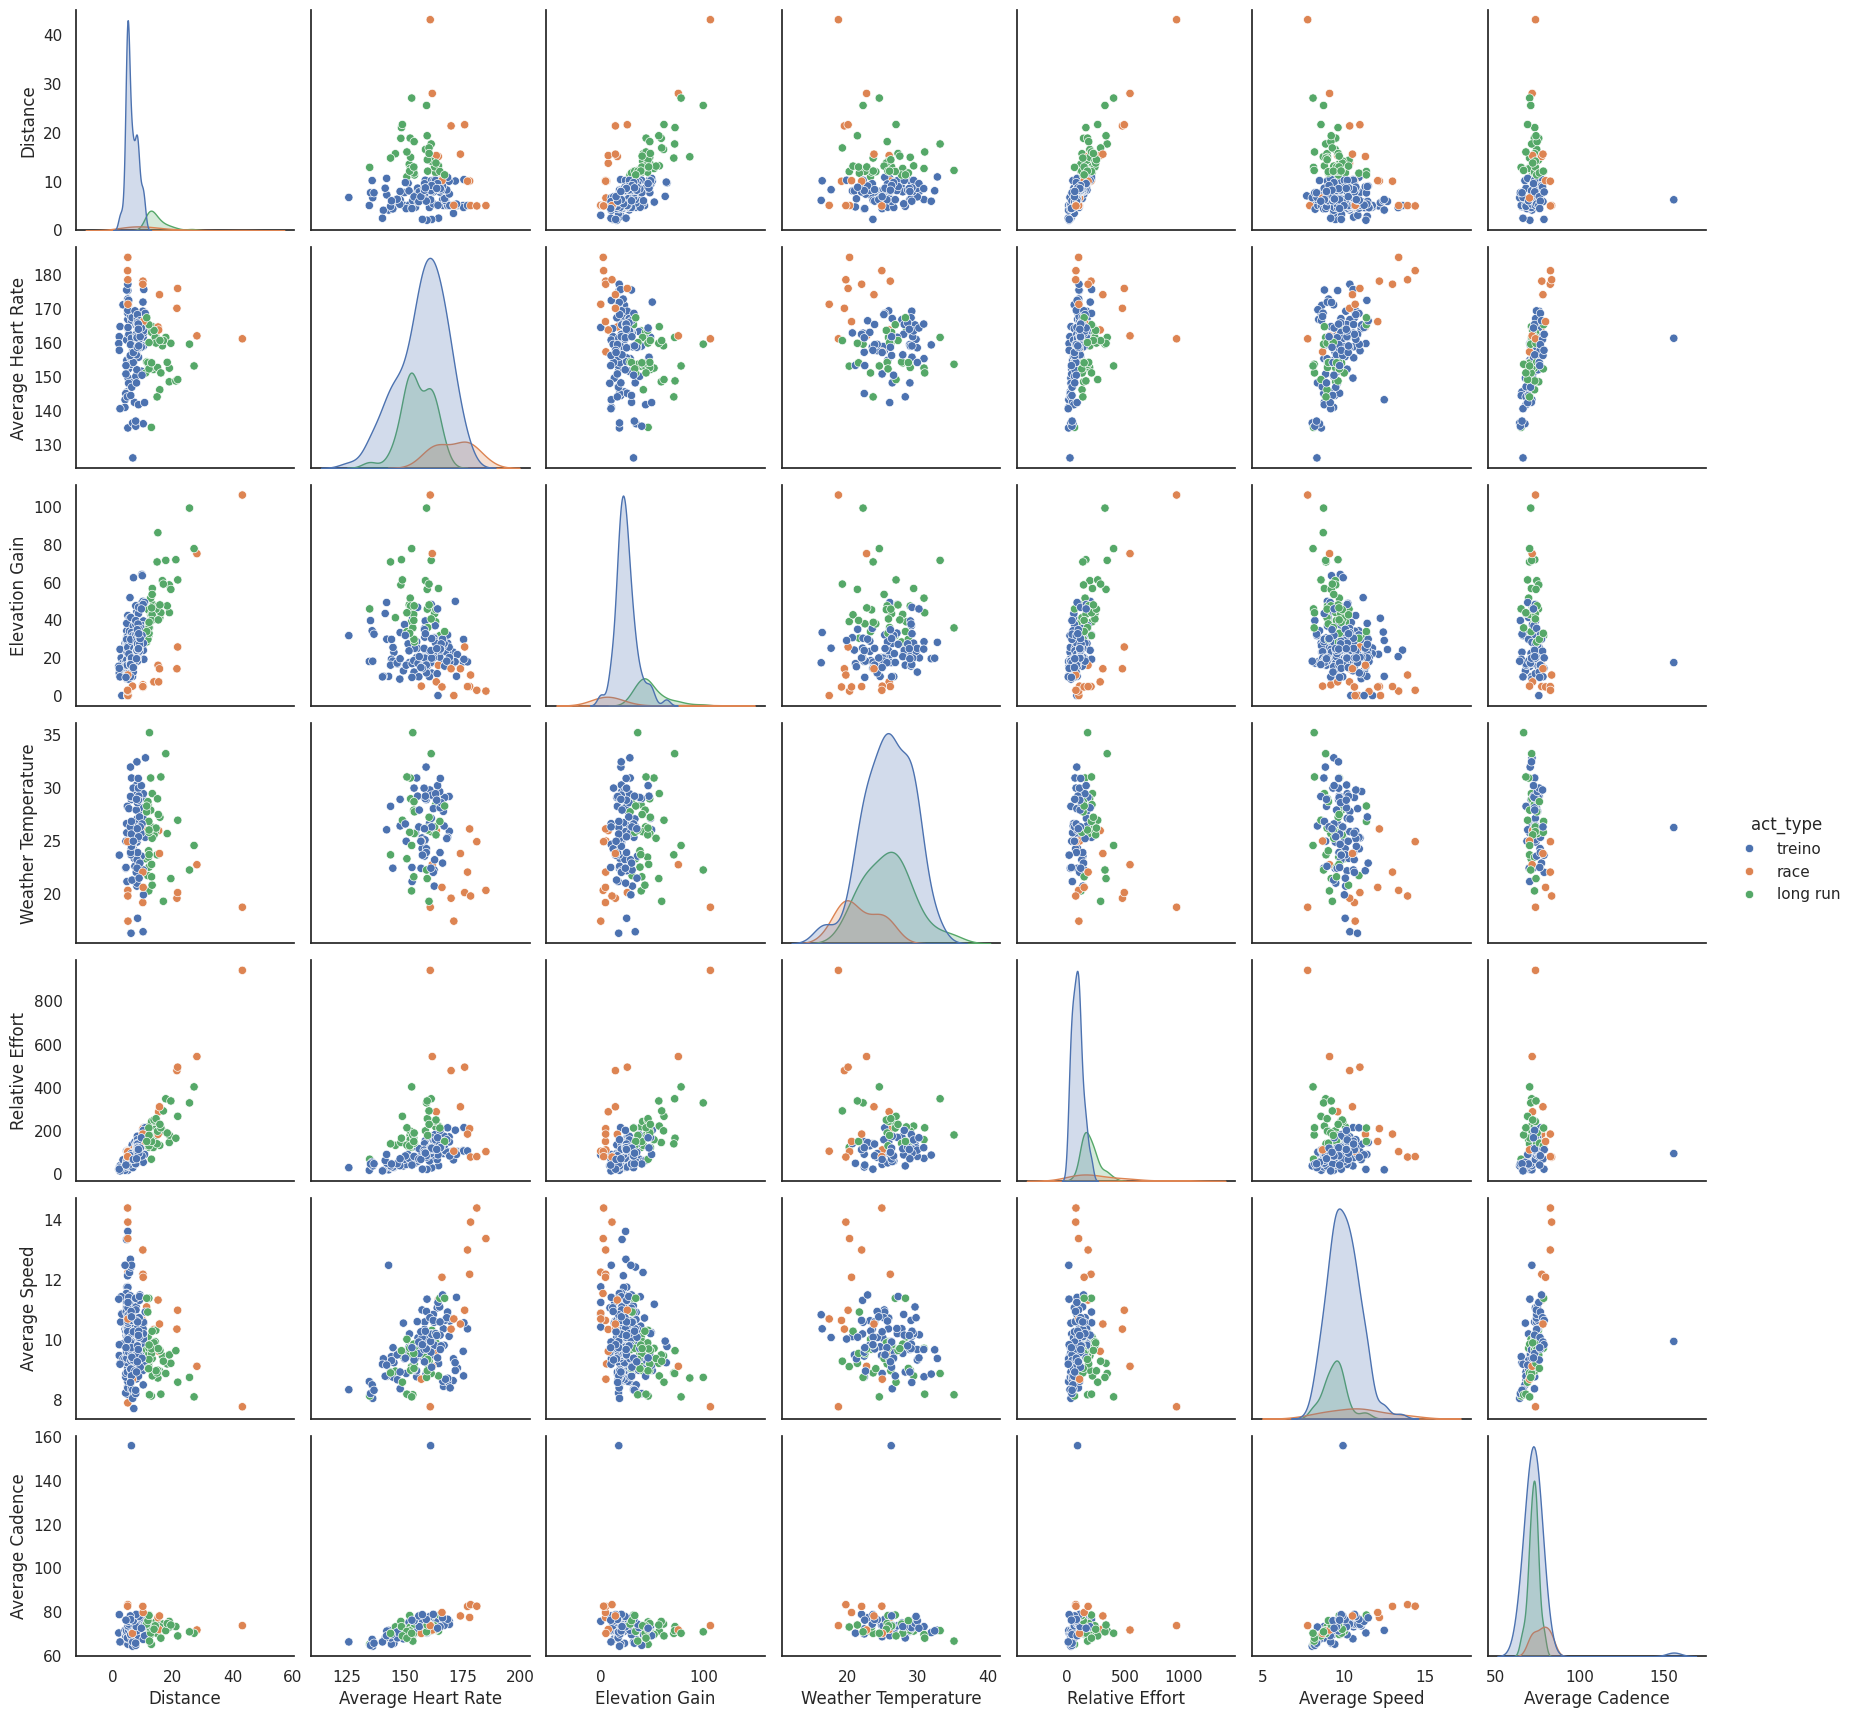

In [1171]:
explore = strava[['Distance', 'Average Heart Rate', 'Elevation Gain', 'Weather Temperature', 'Relative Effort', 'Average Speed','Average Cadence', 'act_type']]
sns.pairplot(explore, hue='act_type')

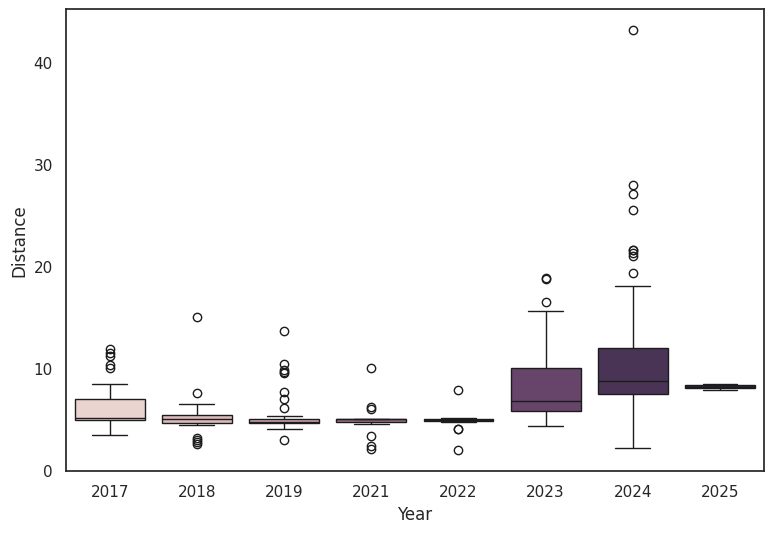

In [1172]:
fig, ax = plt.subplots()
sns.set(style="whitegrid", font_scale=1)
sns.boxplot(x="Year", y="Distance", hue="Year", data=strava)
ax.legend_.remove()
plt.gcf().set_size_inches(9, 6)

''

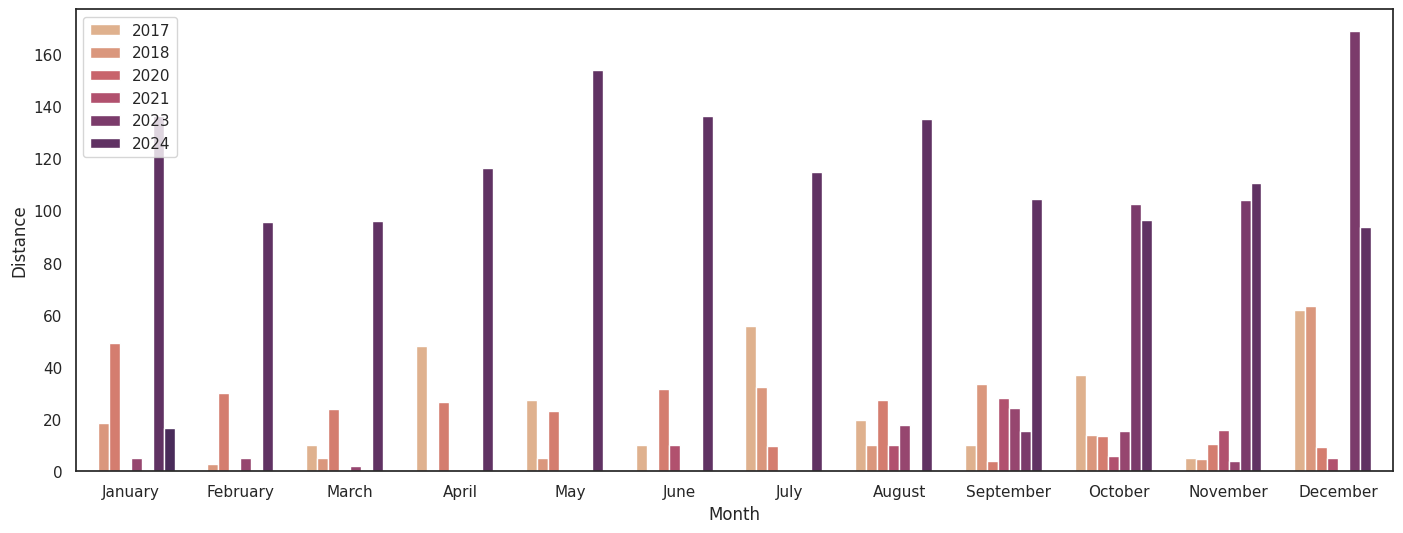

In [1173]:
sns.set_style('white')
sns.barplot(x='Month', y='Distance', data=strava, hue='Year', errorbar=None, estimator=np.sum, palette = 'flare',
           order =["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.gcf().set_size_inches(17, 6)
plt.legend(loc='upper left')
;

In [1174]:
strava['season'] = 'unknown'
strava.loc[(strava["Month"].isin(["March", "April", "May"])), 'season'] = 'Autumn'
strava.loc[(strava["Month"].isin(["June", "July", "August"])), 'season'] = 'Winter'
strava.loc[(strava["Month"].isin(["September", "October", "November"])), 'season'] = 'Spring'
strava.loc[(strava["Month"].isin(["December", "January", "February"])), 'season'] = 'Summer'

<ipython-input-1175-1611dda6724a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="season", y="Distance", palette="Set2",


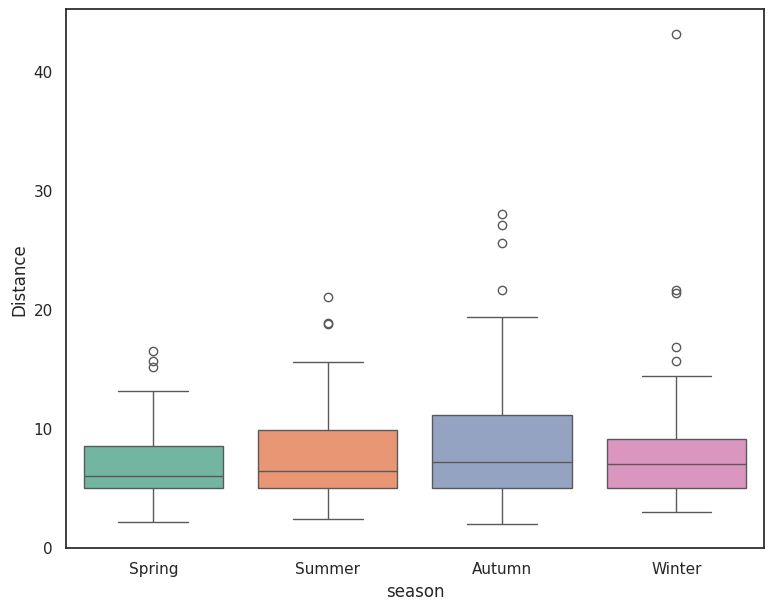

In [1175]:
ax = sns.boxplot(x="season", y="Distance", palette="Set2",
                    data=strava,
                    order =["Spring", 'Summer', 'Autumn', 'Winter'])
plt.gcf().set_size_inches(9, 7)

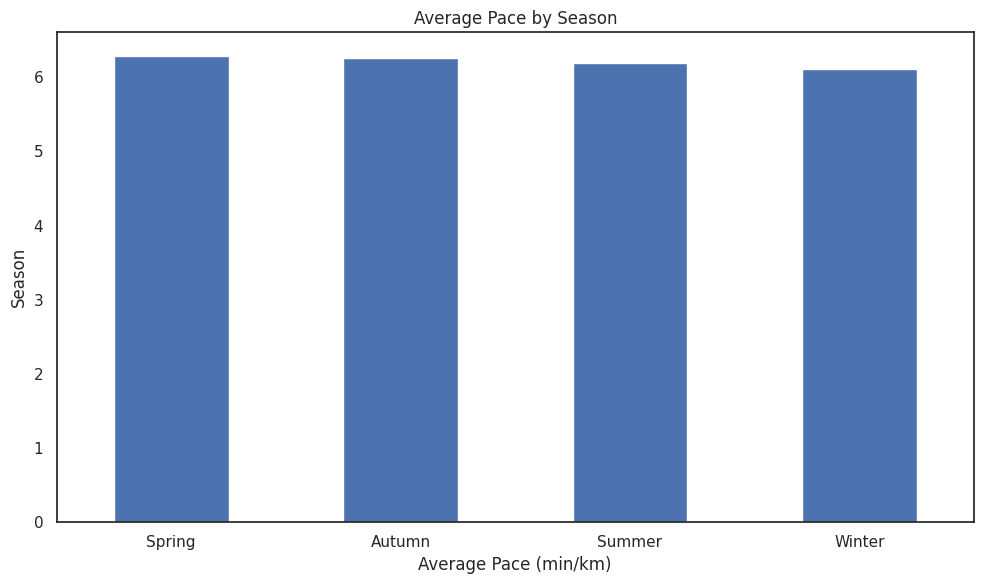

In [1176]:
average_pace_by_season = strava.groupby('season')['pace'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_pace_by_season.plot(kind='bar',)
plt.ylabel('Season')
plt.xlabel('Average Pace (min/km)')
plt.title('Average Pace by Season')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

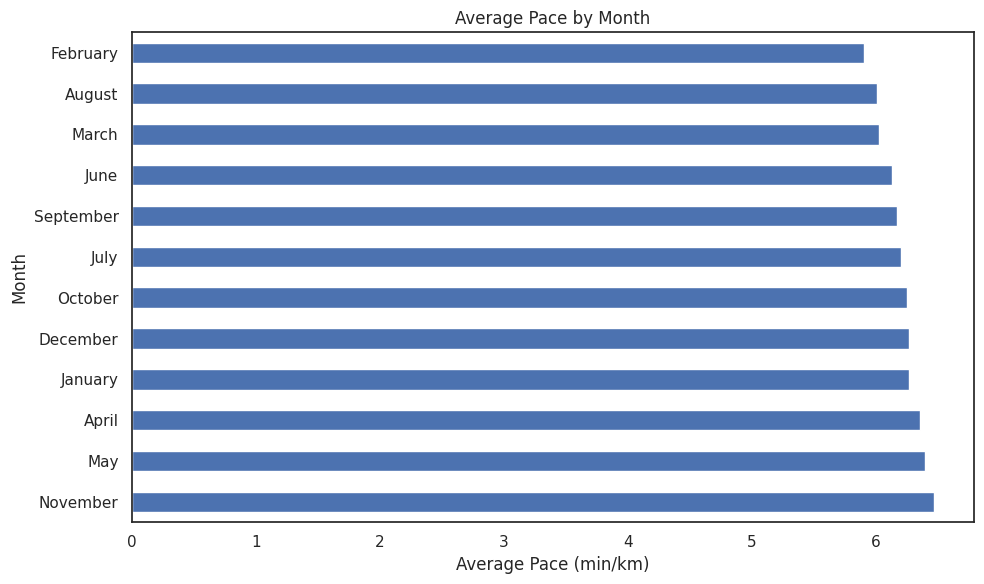

In [1177]:
average_pace_by_month = strava.groupby('Month')['pace'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_pace_by_month.plot(kind='barh',)
plt.ylabel('Month')
plt.xlabel('Average Pace (min/km)')
plt.title('Average Pace by Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

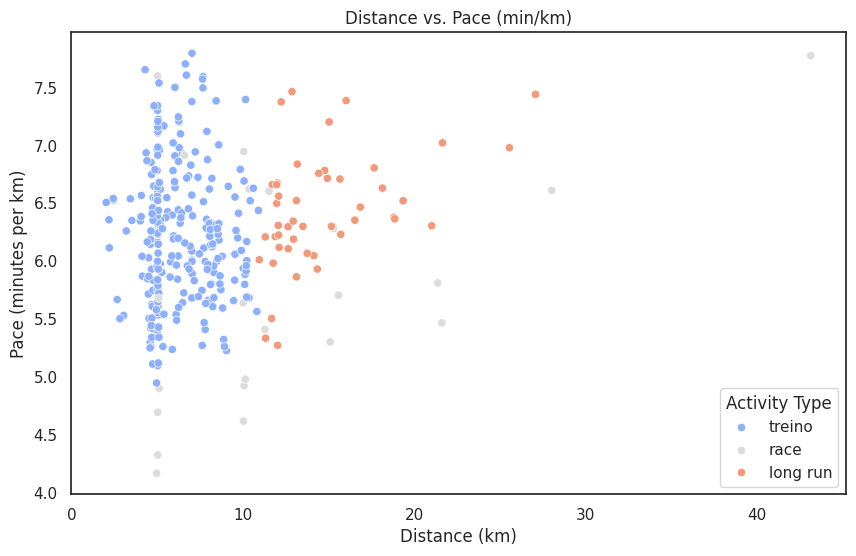

In [1178]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='pace', hue='act_type', data=strava, palette='coolwarm')
plt.title('Distance vs. Pace (min/km)')
plt.xlabel('Distance (km)')
plt.ylabel('Pace (minutes per km)')
plt.legend(title='Activity Type')
plt.show()

<ipython-input-1179-9c9b12f2962b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='act_type', y='pace', data=strava, palette='Set2')


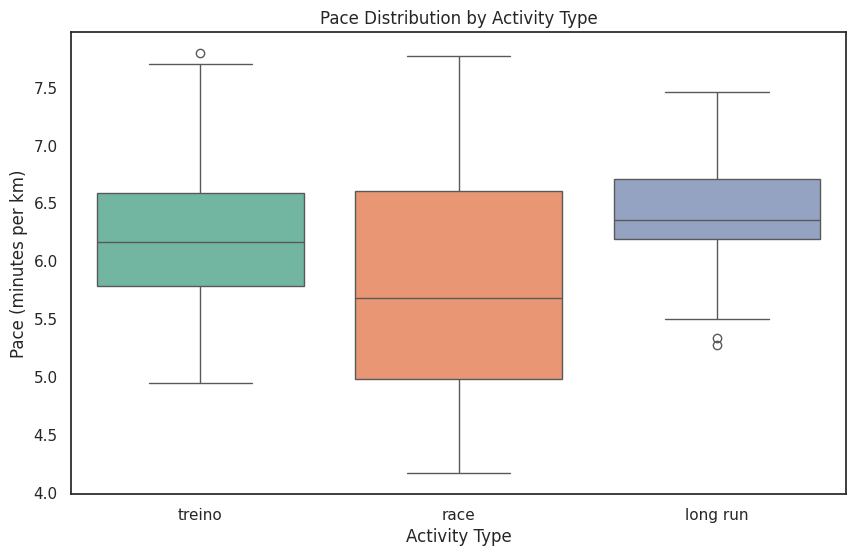

In [1179]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='act_type', y='pace', data=strava, palette='Set2')
plt.title('Pace Distribution by Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Pace (minutes per km)')
plt.show()

<ipython-input-1180-2ca6566b2dac>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_distances = strava.groupby('Month')['Distance'].sum().reset_index()


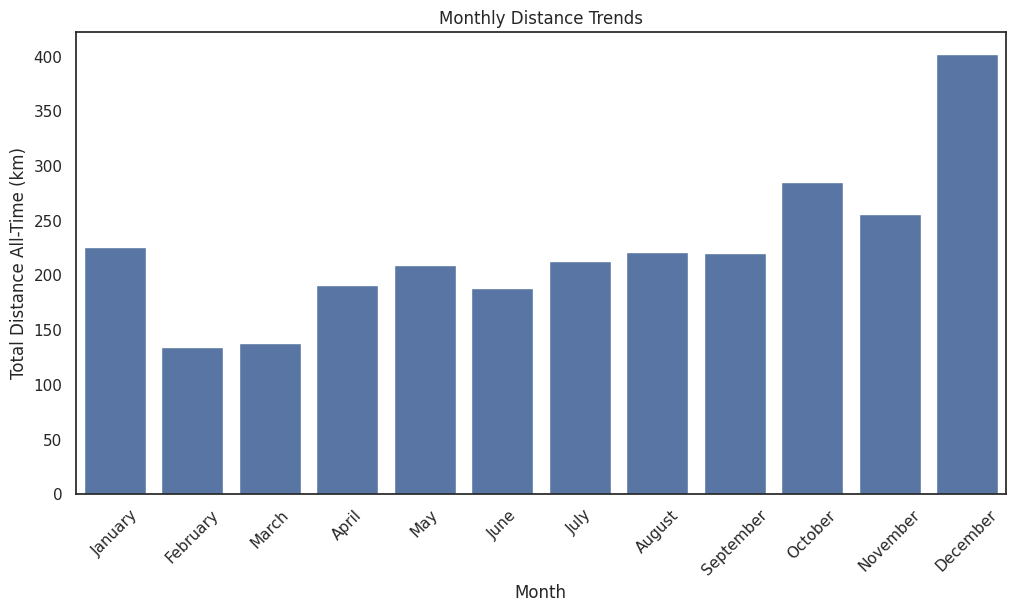

In [1180]:
strava['Month'] = pd.Categorical(strava['Month'],
                                 categories=['January', 'February', 'March', 'April', 'May', 'June',
                                             'July', 'August', 'September', 'October', 'November', 'December'],
                                 ordered=True)


monthly_distances = strava.groupby('Month')['Distance'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Distance', data=monthly_distances)
plt.title('Monthly Distance Trends')
plt.xlabel('Month')
plt.ylabel('Total Distance All-Time (km)')
plt.xticks(rotation=45)
plt.show()

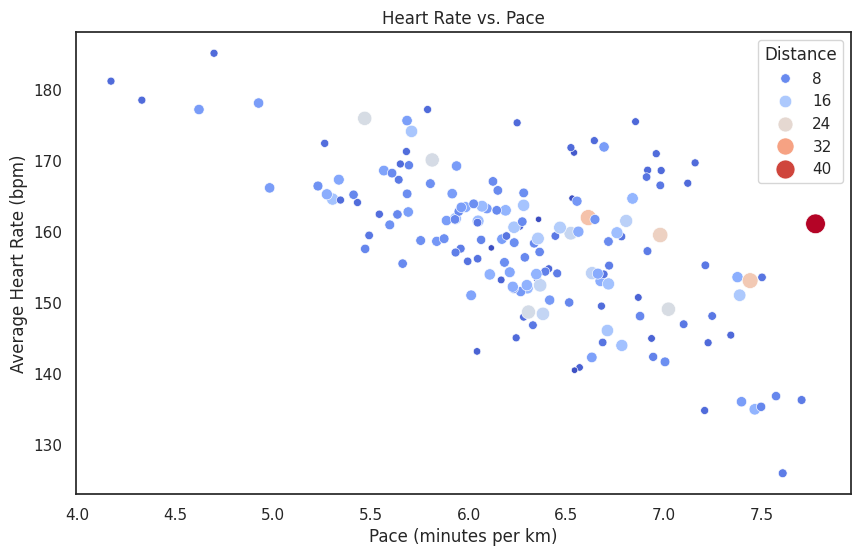

In [1181]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pace', y='Average Heart Rate', hue='Distance', size='Distance', data=strava, palette='coolwarm', sizes=(20, 200))
plt.title('Heart Rate vs. Pace')
plt.xlabel('Pace (minutes per km)')
plt.ylabel('Average Heart Rate (bpm)')
plt.show()

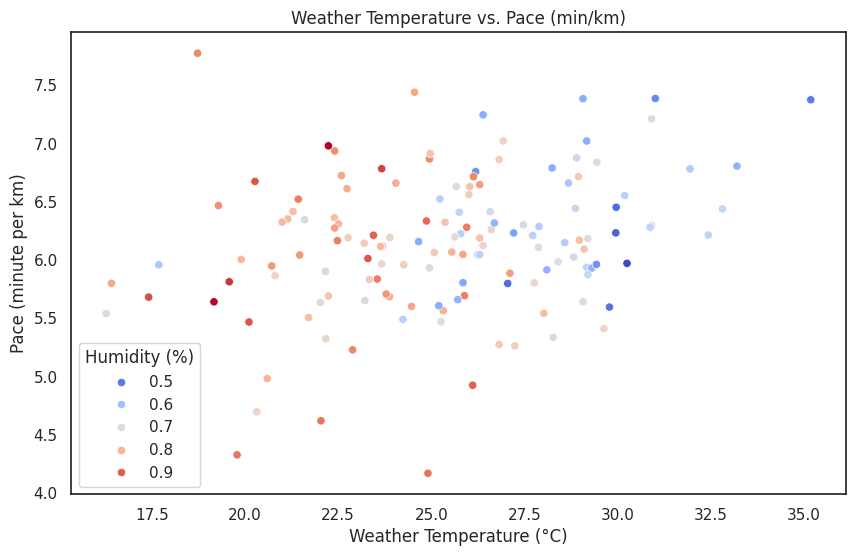

In [1182]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weather Temperature', y='pace', hue='Humidity', data=strava, palette='coolwarm')
plt.title('Weather Temperature vs. Pace (min/km)')
plt.xlabel('Weather Temperature (°C)')
plt.ylabel('Pace (minute per km)')
plt.legend(title='Humidity (%)')
plt.show()

<ipython-input-1183-48fa5a530602>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dayofweek', y='Distance', data=weekly_data, palette='Blues',


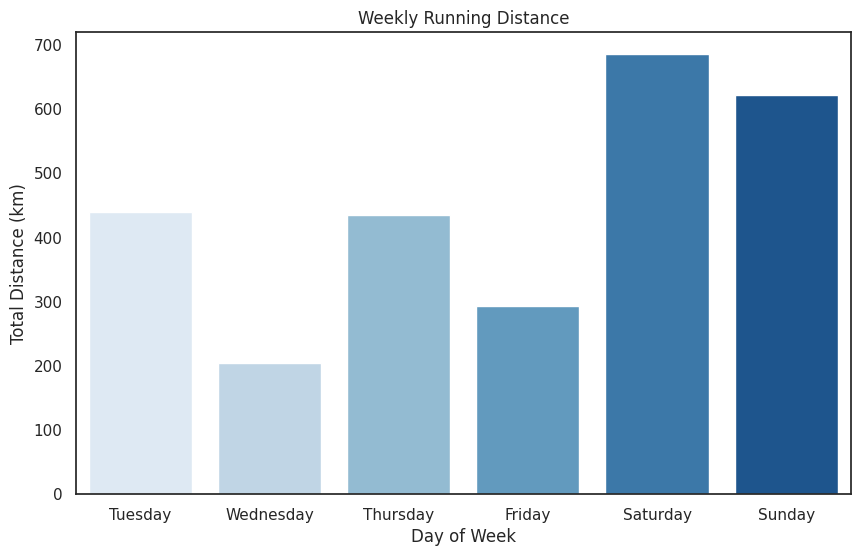

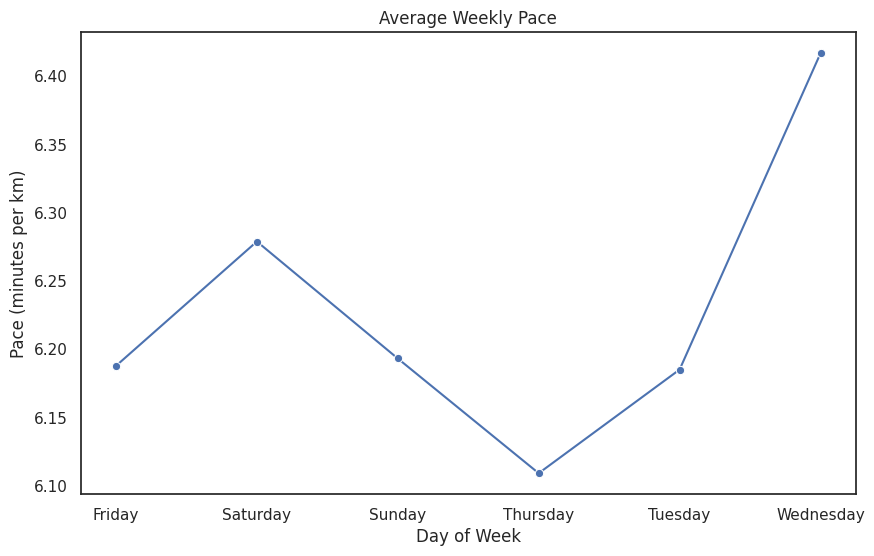

In [1183]:
weekly_data = strava.groupby('dayofweek').agg({'Distance': 'sum', 'pace': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='dayofweek', y='Distance', data=weekly_data, palette='Blues',
            order=['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Weekly Running Distance')
plt.xlabel('Day of Week')
plt.ylabel('Total Distance (km)')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='dayofweek', y='pace', data=weekly_data, marker='o', sort=False)
plt.title('Average Weekly Pace')
plt.xlabel('Day of Week')
plt.ylabel('Pace (minutes per km)')
plt.show()

<ipython-input-1184-c820e1b6b157>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='Distance', data=season_data, palette='mako')


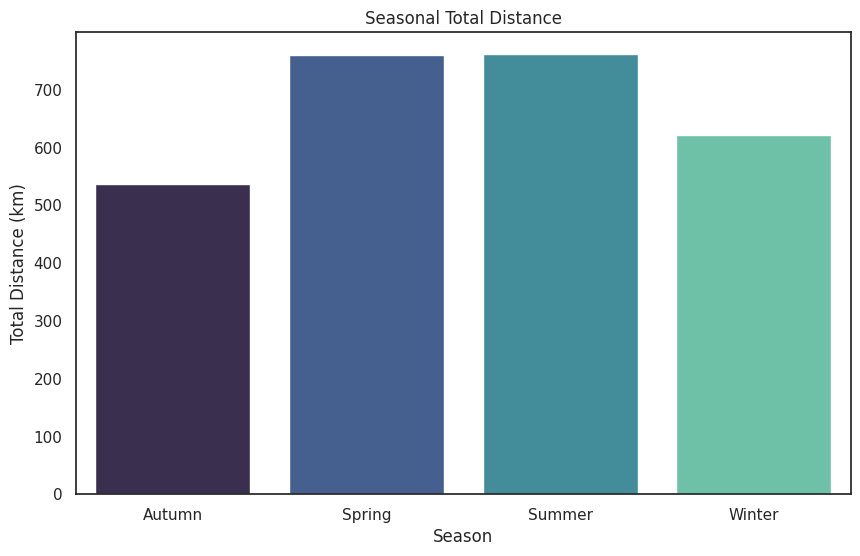

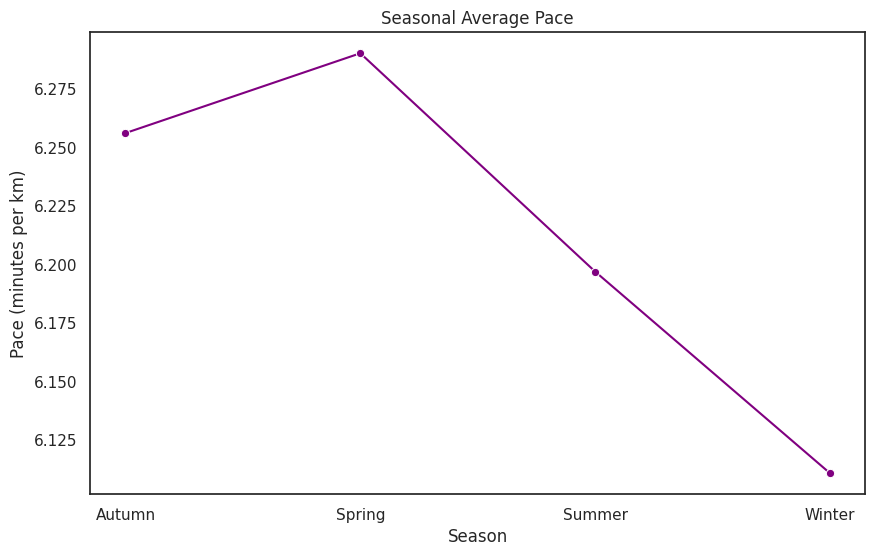

In [1184]:
season_data = strava.groupby('season').agg({'Distance': 'sum', 'pace': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='Distance', data=season_data, palette='mako')
plt.title('Seasonal Total Distance')
plt.xlabel('Season')
plt.ylabel('Total Distance (km)')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='pace', data=season_data, marker='o', color='purple')
plt.title('Seasonal Average Pace')
plt.xlabel('Season')
plt.ylabel('Pace (minutes per km)')
plt.show()

Pace Distribution by Activity Type

<ipython-input-1185-7f96d76df97d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='act_type', y='pace', data=strava, palette='Set2', inner='quartile')


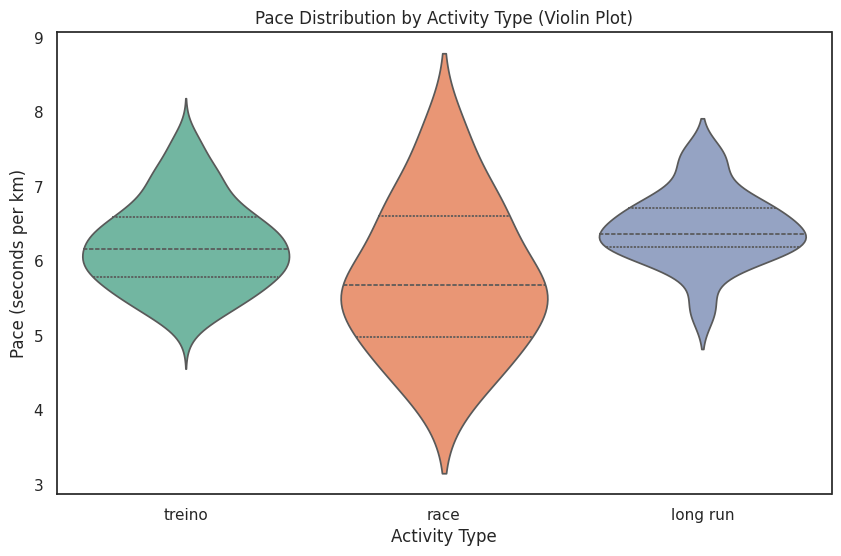

In [1185]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='act_type', y='pace', data=strava, palette='Set2', inner='quartile')
plt.title('Pace Distribution by Activity Type (Violin Plot)')
plt.xlabel('Activity Type')
plt.ylabel('Pace (seconds per km)')
plt.show()

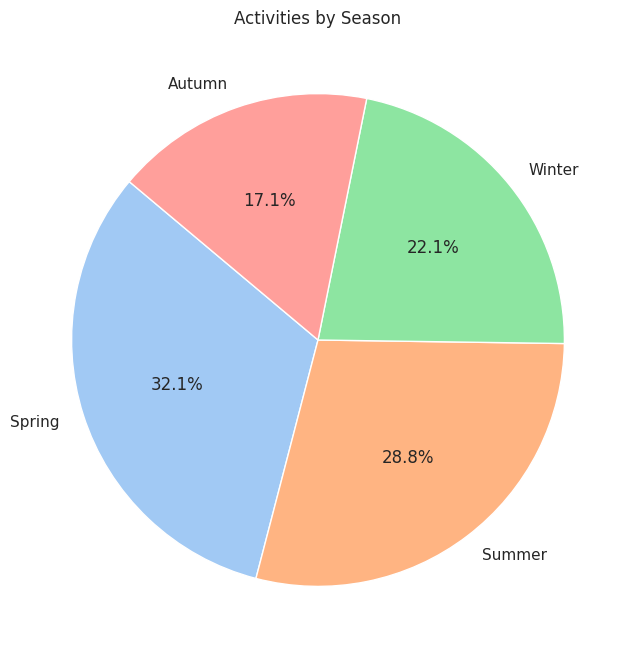

In [1186]:
season_counts = strava['season'].value_counts()

plt.figure(figsize=(8, 8))
season_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Activities by Season')
plt.ylabel('')
plt.show()

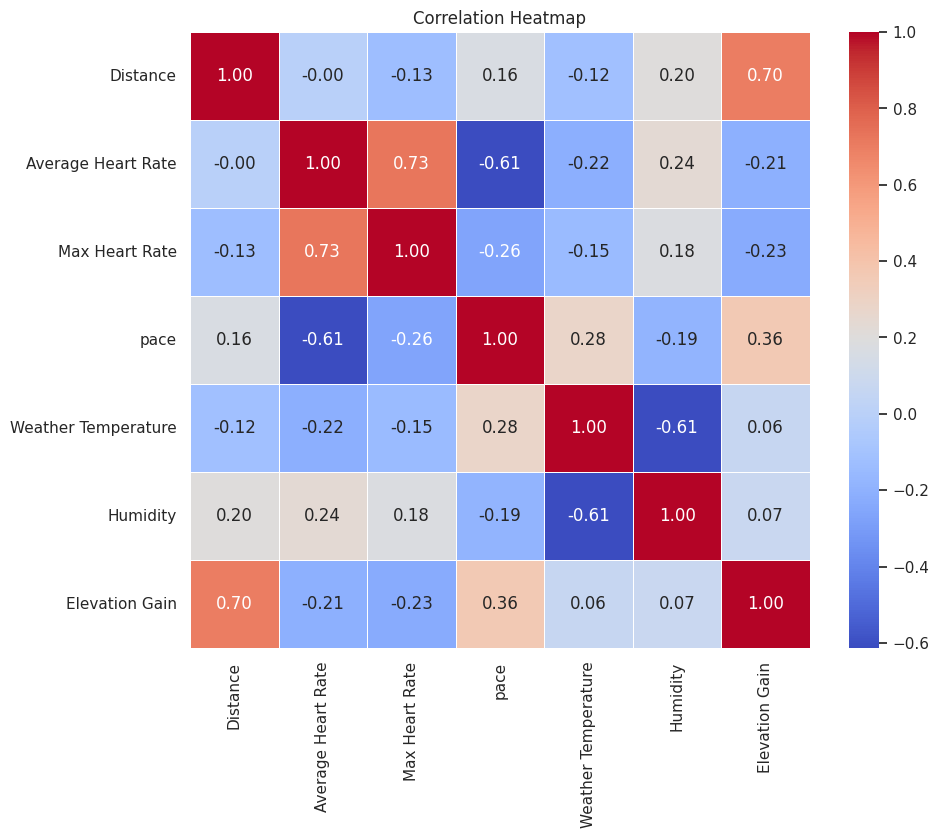

In [1187]:
numeric_cols = ['Distance', 'Average Heart Rate', 'Max Heart Rate', 'pace',
                'Weather Temperature', 'Humidity', 'Elevation Gain']

corr_matrix = strava[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

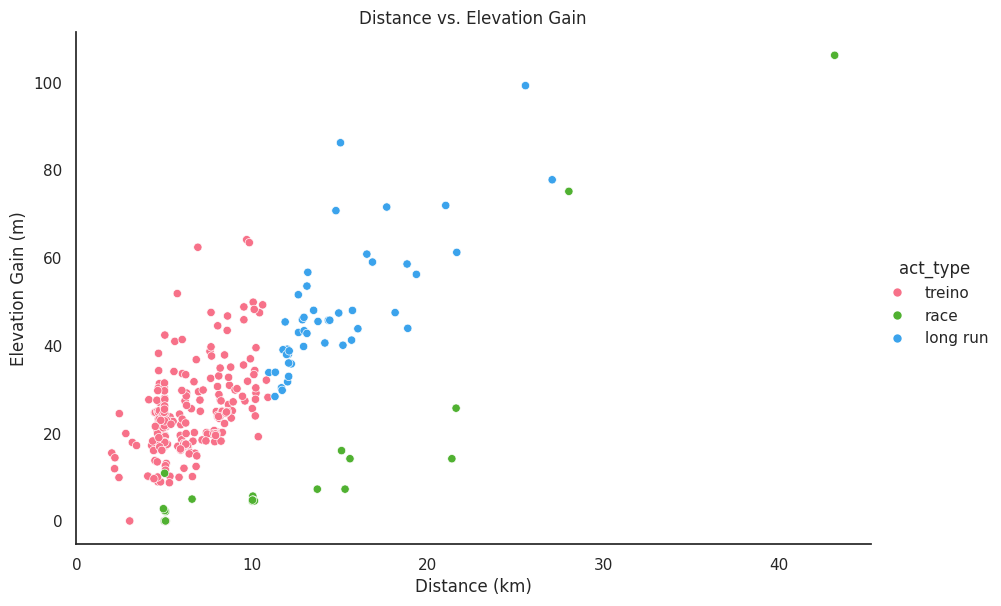

In [1188]:
sns.relplot(x='Distance', y='Elevation Gain', hue='act_type', kind='scatter', data=strava, palette='husl', height=6, aspect=1.5)
plt.title('Distance vs. Elevation Gain')
plt.xlabel('Distance (km)')
plt.ylabel('Elevation Gain (m)')
plt.show()

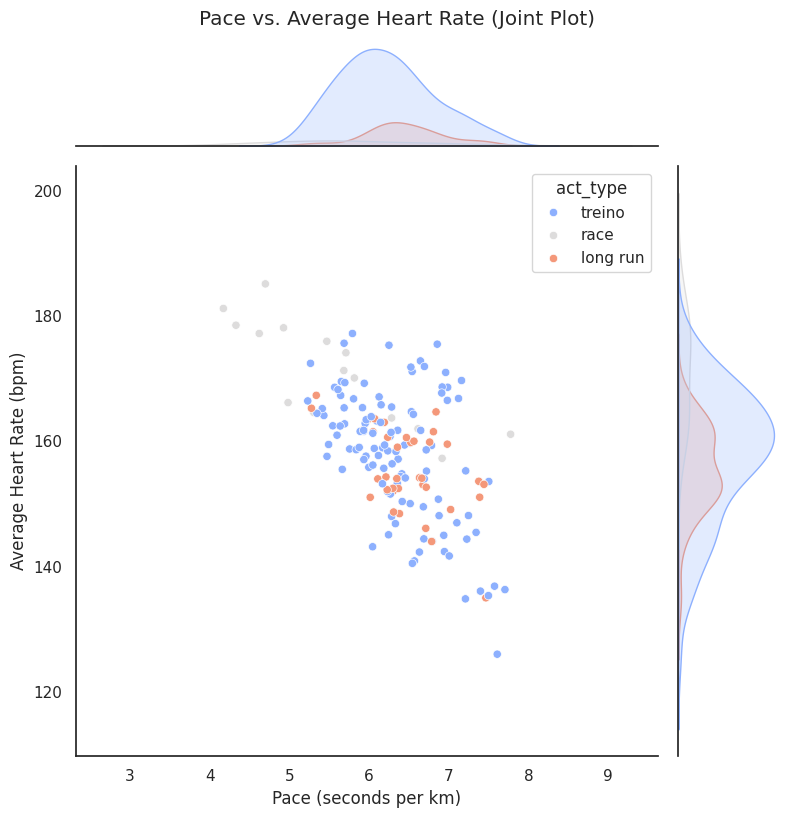

In [1189]:
sns.jointplot(x='pace', y='Average Heart Rate', data=strava, kind='scatter', hue='act_type', palette='coolwarm', height=8)
plt.suptitle('Pace vs. Average Heart Rate (Joint Plot)', y=1.02)
plt.xlabel('Pace (seconds per km)')
plt.ylabel('Average Heart Rate (bpm)')
plt.show()

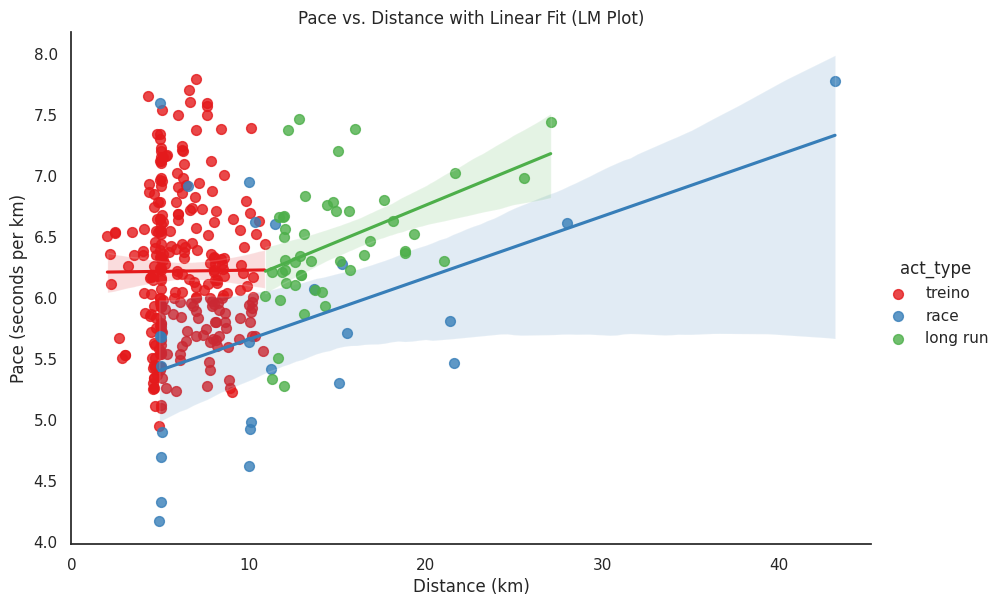

In [1190]:
sns.lmplot(x='Distance', y='pace', hue='act_type', data=strava, height=6, aspect=1.5, palette='Set1', scatter_kws={'s': 50})
plt.title('Pace vs. Distance with Linear Fit (LM Plot)')
plt.xlabel('Distance (km)')
plt.ylabel('Pace (seconds per km)')
plt.show()

<ipython-input-1191-51e5960a0c41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayofweek', y='Average Heart Rate', data=strava, palette='muted', order=['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


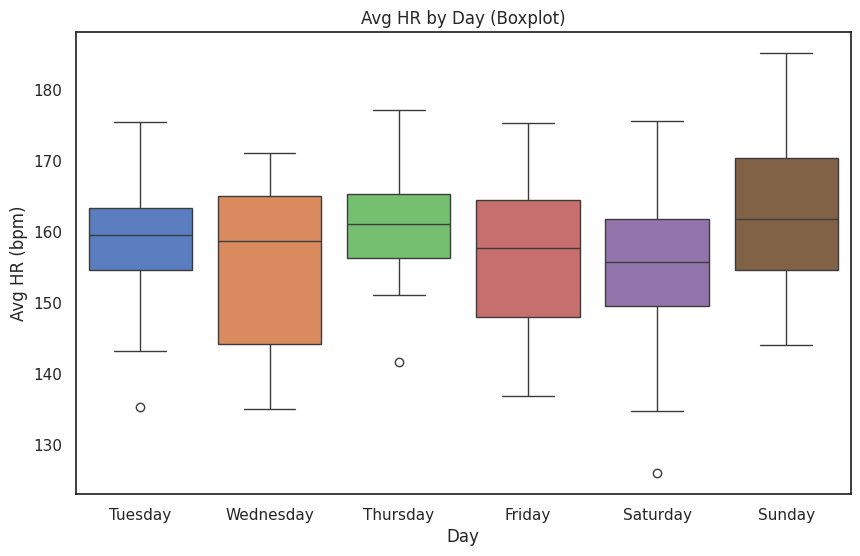

In [1191]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dayofweek', y='Average Heart Rate', data=strava, palette='muted', order=['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Avg HR by Day (Boxplot)')
plt.xlabel('Day')
plt.ylabel('Avg HR (bpm)')
plt.show()

<ipython-input-1192-d677597b4c78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Average Heart Rate', data=strava, palette='muted')


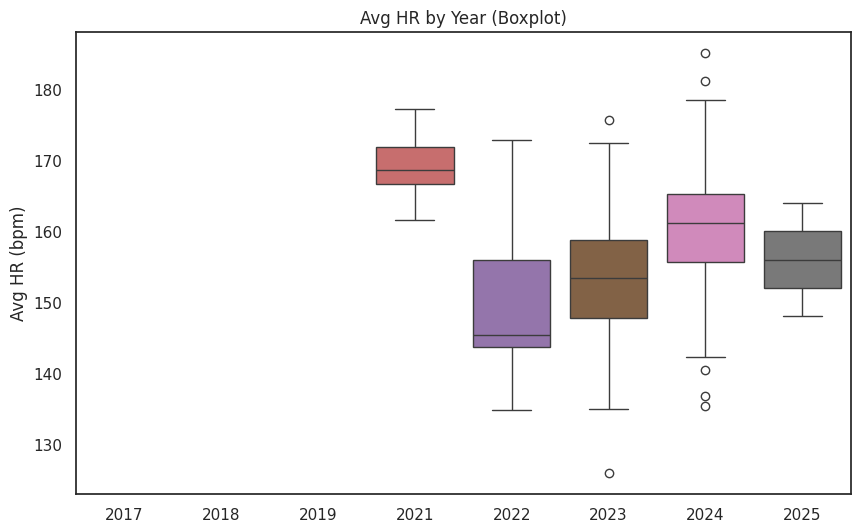

In [1192]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Average Heart Rate', data=strava, palette='muted')
plt.title('Avg HR by Year (Boxplot)')
plt.xlabel('')
plt.ylabel('Avg HR (bpm)')
plt.show()

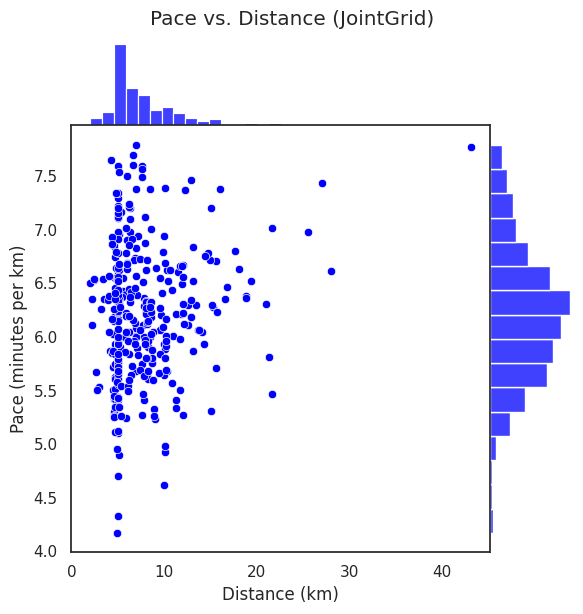

In [1193]:
g = sns.JointGrid(data=strava, x='Distance', y='pace', space=0)
g.plot(sns.scatterplot, sns.histplot, color='blue')
g.set_axis_labels('Distance (km)', 'Pace (minutes per km)')
plt.suptitle('Pace vs. Distance (JointGrid)', y=1.02)
plt.show()

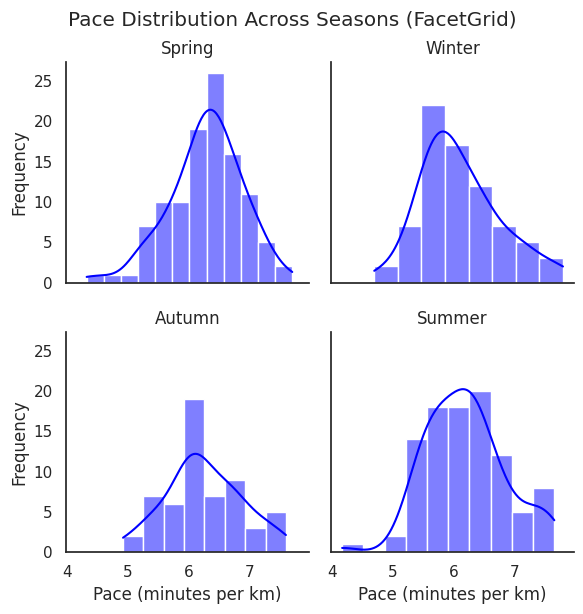

In [1194]:
g = sns.FacetGrid(strava, col='season', height=3, aspect=1, col_wrap=2, sharex=True, sharey=True, palette='coolwarm')
g.map(sns.histplot, 'pace', kde=True, color='blue')
g.set_axis_labels('Pace (minutes per km)', 'Frequency')
g.set_titles('{col_name}')
g.fig.suptitle('Pace Distribution Across Seasons (FacetGrid)', y=1.02)
plt.show()

preditor de tempo de maratona

In [1195]:
strava.head(5)

,Activity Date,Activity Name,Elapsed Time,Distance,Max Heart Rate,Average Heart Rate,Relative Effort,Max Speed,Average Speed,Elevation Gain,...,Wind Speed,Precipitation Intensity,Start Time,Date,Month,Year,dayofweek,pace,act_type,season
0,2017-10-11 18:31:00-03:00,Evening Run,22.233333,3.50,NaN,NaN,NaN,NaN,9.45,NaN,...,NaN,NaN,18:31,11/10/17,October,2017,Wednesday,6.352381,treino,Spring
1,2017-10-01 08:06:00-03:00,Circuito das Estações 2017 - Etapa Primavera,75.950000,11.50,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,08:06,01/10/17,October,2017,Sunday,6.604348,race,Spring
2,2017-09-16 18:25:00-03:00,Evening Run,35.616667,5.00,NaN,NaN,NaN,NaN,8.42,NaN,...,NaN,NaN,18:25,16/09/17,September,2017,Saturday,7.123333,treino,Spring
3,2017-08-13 21:32:00-03:00,Night Run - Etapa Blue,61.000000,11.27,NaN,NaN,NaN,NaN,11.09,NaN,...,NaN,NaN,21:32,13/08/17,August,2017,Sunday,5.412600,race,Winter
4,2017-08-05 10:27:00-03:00,Morning Run,50.833333,8.47,NaN,NaN,NaN,NaN,10.00,NaN,...,NaN,NaN,10:27,05/08/17,August,2017,Saturday,6.001574,treino,Winter


In [1196]:
strava.dtypes

,0
Activity Date,"datetime64[ns, America/Sao_Paulo]"
Activity Name,object
Elapsed Time,float64
Distance,float64
Max Heart Rate,float64
Average Heart Rate,float64
Relative Effort,float64
Max Speed,float64
Average Speed,float64
Elevation Gain,float64


In [1197]:
strava.to_csv('strava.csv', index=False)

In [1198]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1199]:
strava['Activity Date'] = pd.to_datetime(strava['Activity Date'])

strava['weight'] = np.where(strava['Activity Date'] >= (strava['Activity Date'].max() - pd.DateOffset(months=4)), 2.0, 1.0)

In [1200]:
strava['month'] = strava['Activity Date'].dt.month
strava['is_race'] = (strava['act_type'] == 'race').astype(int)

features = ['Distance', 'Elevation Gain', 'Average Heart Rate', 'is_race', 'Weather Temperature']
target = 'pace'

In [1201]:
scaler = StandardScaler()
strava[features] = scaler.fit_transform(strava[features])

In [1202]:
X = strava[features]
y = strava[target]
weights = strava['weight']
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, weights, test_size=0.2, random_state=42)

In [1203]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [1204]:
model = LinearRegression()
model.fit(X_train, y_train, sample_weight=w_train)

LinearRegression()

In [1205]:
race_distances = pd.DataFrame({'Distance': [5, 10, 21, 42],
                               'Elevation Gain': [0, 0, 0, 0],
                               'Average Heart Rate': [180, 175, 170, 160],
                               'is_race': [1, 1, 1, 1],
                               'Weather Temperature':[25, 25, 25, 25]})

In [1206]:
race_distances_scaled = scaler.transform(race_distances)

In [1207]:
predicted_pace = model.predict(race_distances_scaled)

In [1208]:
predicted_pace

array([5.08413734, 5.25542479, 5.40210209, 5.69955838])

In [1209]:
distances = np.array([5, 10, 21.1, 42.195])

finish_times_minutes = predicted_pace * distances

def format_time(minutes):
    hrs = int(minutes // 60)
    mins = int(minutes % 60)
    secs = int((minutes % 1) * 60)
    return f"{hrs:02}:{mins:02}:{secs:02}"

formatted_finish_times = [format_time(time) for time in finish_times_minutes]

results = pd.DataFrame({
    "Distance (km)": distances,
    "Predicted Pace (min/km)": [f"{pace:.2f}" for pace in predicted_pace],
    "Finish Time (HH:MM:SS)": formatted_finish_times
})

results

,Distance (km),Predicted Pace (min/km),Finish Time (HH:MM:SS)
0,5.000,5.08,00:25:25
1,10.000,5.26,00:52:33
2,21.100,5.40,01:53:59
3,42.195,5.70,04:00:29


Random Forest

In [1211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

strava = pd.read_csv('/content/strava.csv')

# Preprocess the data
strava['Activity Date'] = pd.to_datetime(strava['Activity Date'])
#strava['pace_seconds'] = strava['pace'].astype(float)  # Ensure pace is in seconds/km
strava['weight'] = np.where(
    strava['Activity Date'] >= (strava['Activity Date'].max() - pd.DateOffset(months=4)),
    2.0,  # Higher weight for recent data
    1.0
)

# Feature Engineering
features = ['Distance', 'Elevation Gain', 'Average Heart Rate', 'Max Heart Rate']
target = 'pace'

# Standardize features
scaler = StandardScaler()
strava[features] = scaler.fit_transform(strava[features])

# Train-Test Split
X = strava[features]
y = strava[target]
weights = strava['weight']
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, weights, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train, sample_weight=w_train)

# Predict paces for specific distances
race_distances = pd.DataFrame({
    'Distance': [5, 10, 21.1, 42.195],
    'Elevation Gain': [0, 0, 0, 0],
    'Average Heart Rate': [180, 175, 170, 160],  # Example HR
    'Max Heart Rate': [190, 180, 180, 180]  # Example max HR
})
race_distances_scaled = scaler.transform(race_distances)
predicted_paces_rf = rf_model.predict(race_distances_scaled)

# Calculate finish times in minutes
finish_times_minutes_rf = predicted_paces_rf * race_distances['Distance']

# Convert finish times to HH:MM:SS
formatted_finish_times_rf = [format_time(time) for time in finish_times_minutes_rf]

# Create a neat output
results_rf = pd.DataFrame({
    "Distance (km)": race_distances['Distance'],
    "Predicted Pace (min/km)": [f"{pace:.2f}" for pace in predicted_paces_rf],
    "Finish Time (HH:MM:SS)": formatted_finish_times_rf
})

results_rf

<ipython-input-1211-439c4f523929>:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  strava['Activity Date'] = pd.to_datetime(strava['Activity Date'])
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,Distance (km),Predicted Pace (min/km),Finish Time (HH:MM:SS)
0,5.000,4.68,00:23:24
1,10.000,5.36,00:53:35
2,21.100,5.37,01:53:24
3,42.195,5.49,03:51:51
